#  S参数-稳定性问题求解 

## * 导入SNP file

2-Port Network: '600S0R1',  0.0-33.0 GHz, 402 pts, z0=[50.+0.j 50.+0.j]


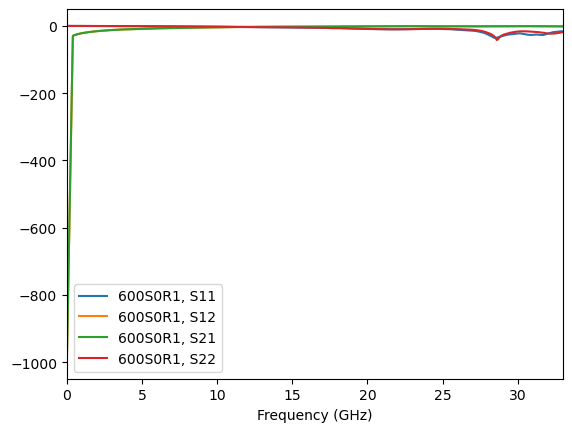

In [1]:
%matplotlib inline
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt


tiaSnp=rf.Network('./snpFileCap/600S0R1.S2P')
print(tiaSnp)
tiaSnp.plot_s_db()

## * 构建函数求解K和DetaS
$$ \Delta S=s11 s22-s12 s21  $$
$$ K=\cfrac{1-|s11|^2-|s22|^2+|\Delta S|^2}{2|s11||s22|} >1 $$

In [2]:
#spara输入S参数，spara是一个2*2的矩阵。array([[tiaS11,tiaS21],[tiaS12,tiaS22]])
def calculateK(spara):
#spara=np.empty((2,2),dtype=complex)  
#spara=np.array([[tiaS11,tiaS21],[tiaS12,tiaS22]])
#求解deltaS
    deltaS=spara[0,0]*spara[1,1]-spara[0,1]*spara[1,0]
#求解K
    Ka=1-abs(spara[0,0])**2-abs(spara[1,1])**2+abs(deltaS)**2
    Kb=2*abs(spara[0,0])*abs(spara[1,1])
    K=Ka/Kb
    return K,deltaS

## * 求解K向量

Text(0.5, 1.0, '$ \\Delta S $')

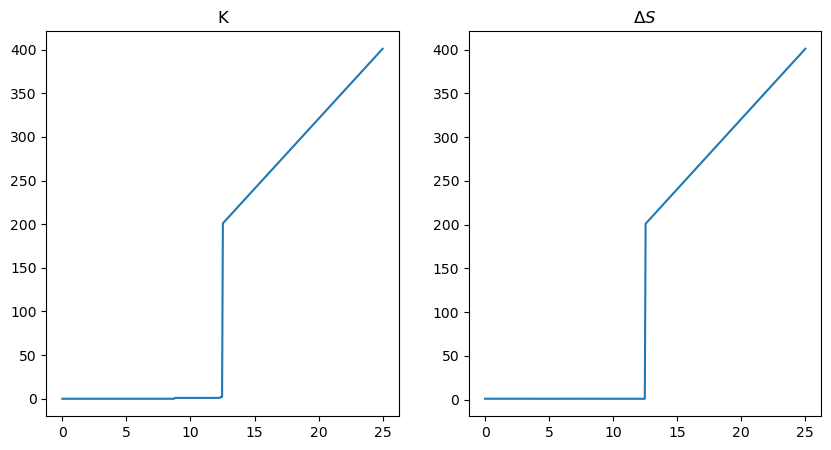

In [3]:
#调用稳定因子K的求解函数，求解向量K的值
tiaKshape=np.shape(tiaSnp.s)[0]
#构建K和DeltaS向量
tiaK=np.arange(tiaKshape)
tiaDeltaS=np.arange(tiaKshape,dtype=complex)

for i in range(201):
    [tiaK[i],tiaDeltaS[i]]=calculateK(tiaSnp.s[i,:])

x = np.linspace(0,25,tiaKshape)
y1 = tiaK
y2 = abs(tiaDeltaS)

###h画图#######
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x,y1)
ax[1].plot(x,y2)
###设置图形#
ax[0].set_title('K')
ax[1].set_title('$ \Delta S $')